# Importing Libraries and Modules

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [ ]:
IMAGE_SIZE = (150,150)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHES= 100

# Importing Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Uprak Deployment/Proyek Akhir/Dataset Corn/train",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 7316 files belonging to 4 classes.


In [ ]:
import os
import glob as gb
path = "/content/drive/MyDrive/Uprak Deployment/Proyek Akhir/Dataset Corn/train"
size=[]
for folder in os.listdir(path):
    files = gb.glob(pathname=str(path+"//"+folder+"/*.jpg"))
    for file in files:
        image=plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(256, 256, 3)    2279
dtype: int64

In [ ]:
class_names = dataset.class_names
class_names

['Common_rust', 'Gray_leaf_spot', 'Healthy', 'Leaf_Blight']

In [ ]:
len(dataset)

229

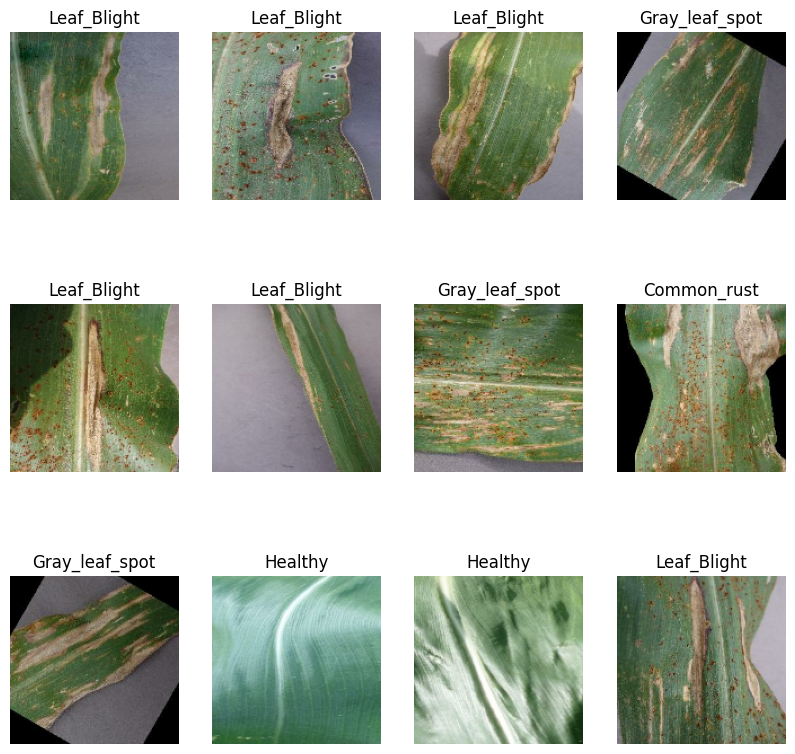

In [ ]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

# Data Agumentation

In [ ]:
def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size) 
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset(dataset)

In [ ]:
print("Length of Training Dataset is",len(train_ds))
print("\nLength of Validation Dataset is",len(val_ds))
print("\nLength of Testing Dataset is",len(test_ds))

Length of Training Dataset is 183

Length of Validation Dataset is 22

Length of Testing Dataset is 24


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
layers.experimental.preprocessing.Resizing(150,150),
layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Model Building

In [ ]:
n_classes = 4
input_shape = (BATCH_SIZE,150,150,3)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation ='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 150, 150, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 150, 150, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 148, 148, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 74, 74, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 72, 72, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 36, 36, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

# Model Fitting

In [ ]:
history = model.fit(
train_ds,
epochs=50,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds)

Epoch 1/50
183/183 [==============================] - 284s 91ms/step - loss: 0.4717 - accuracy: 0.7791 - val_loss: 0.5287 - val_accuracy: 0.8026
Epoch 2/50
183/183 [==============================] - 5s 27ms/step - loss: 0.2929 - accuracy: 0.8802 - val_loss: 0.3063 - val_accuracy: 0.8537
Epoch 3/50
183/183 [==============================] - 5s 26ms/step - loss: 0.2124 - accuracy: 0.9201 - val_loss: 0.2190 - val_accuracy: 0.8892
Epoch 4/50
183/183 [==============================] - 5s 26ms/step - loss: 0.1559 - accuracy: 0.9410 - val_loss: 0.1776 - val_accuracy: 0.9105
Epoch 5/50
183/183 [==============================] - 5s 27ms/step - loss: 0.1649 - accuracy: 0.9384 - val_loss: 0.1467 - val_accuracy: 0.9432
Epoch 6/50
183/183 [==============================] - 5s 25ms/step - loss: 0.1338 - accuracy: 0.9517 - val_loss: 0.1591 - val_accuracy: 0.9375
Epoch 7/50
183/183 [==============================] - 5s 25ms/step - loss: 0.1289 - accuracy: 0.9514 - val_loss: 0.1957 - val_accuracy: 0.92

In [ ]:
scores = model.evaluate(test_ds)

24/24 [==============================] - 11s 12ms/step - loss: 0.0512 - accuracy: 0.9792


In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 183}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

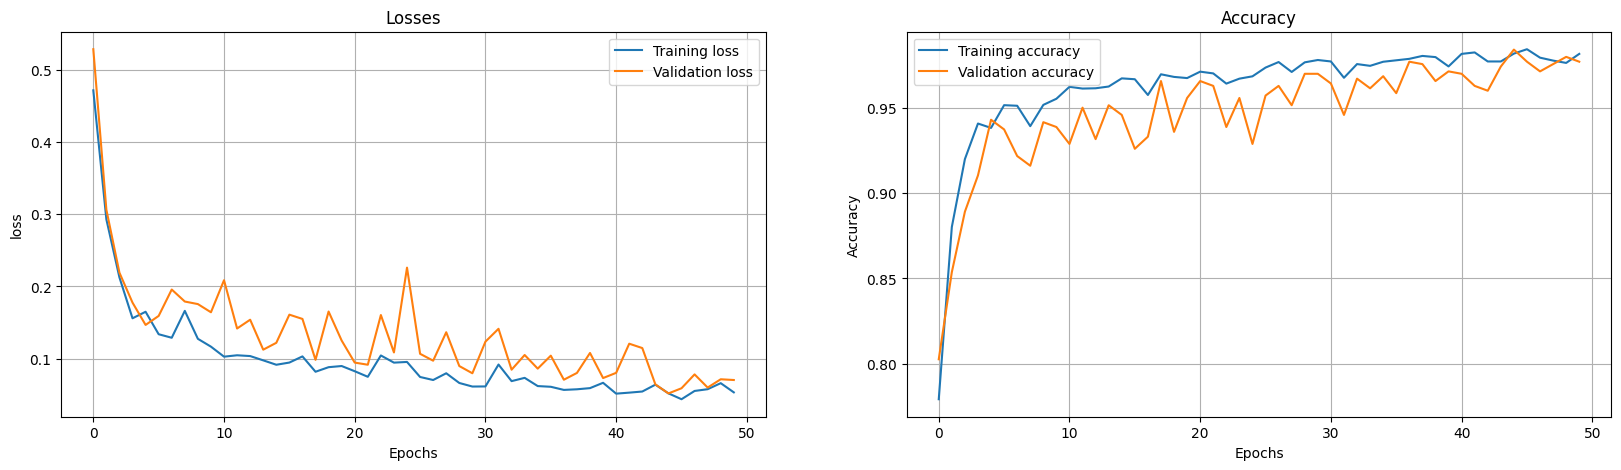

In [ ]:
his_data = pd.DataFrame(history.history)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(his_data.loss, label="Training loss")
plt.plot(his_data.val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Losses")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(his_data.accuracy, label="Training accuracy")
plt.plot(his_data.val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()

# Prediction

First Image to Predict :

Actual label: Common_rust
1/1 [==============================] - 0s 133ms/step

Predicted label Common_rust


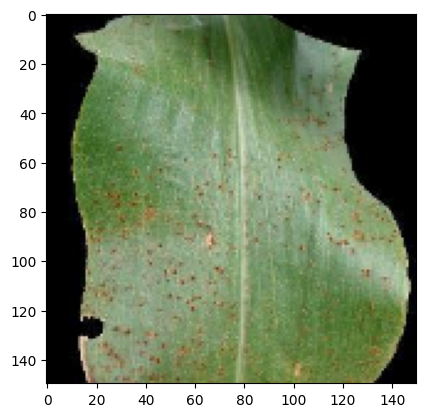

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First Image to Predict :")
    plt.imshow(first_image)
    print("\nActual label:",class_names[first_label])
    batch_prediction = model. predict (images_batch) 
    print("\nPredicted label" ,class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict (img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(np.max(predictions[0]),2)
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


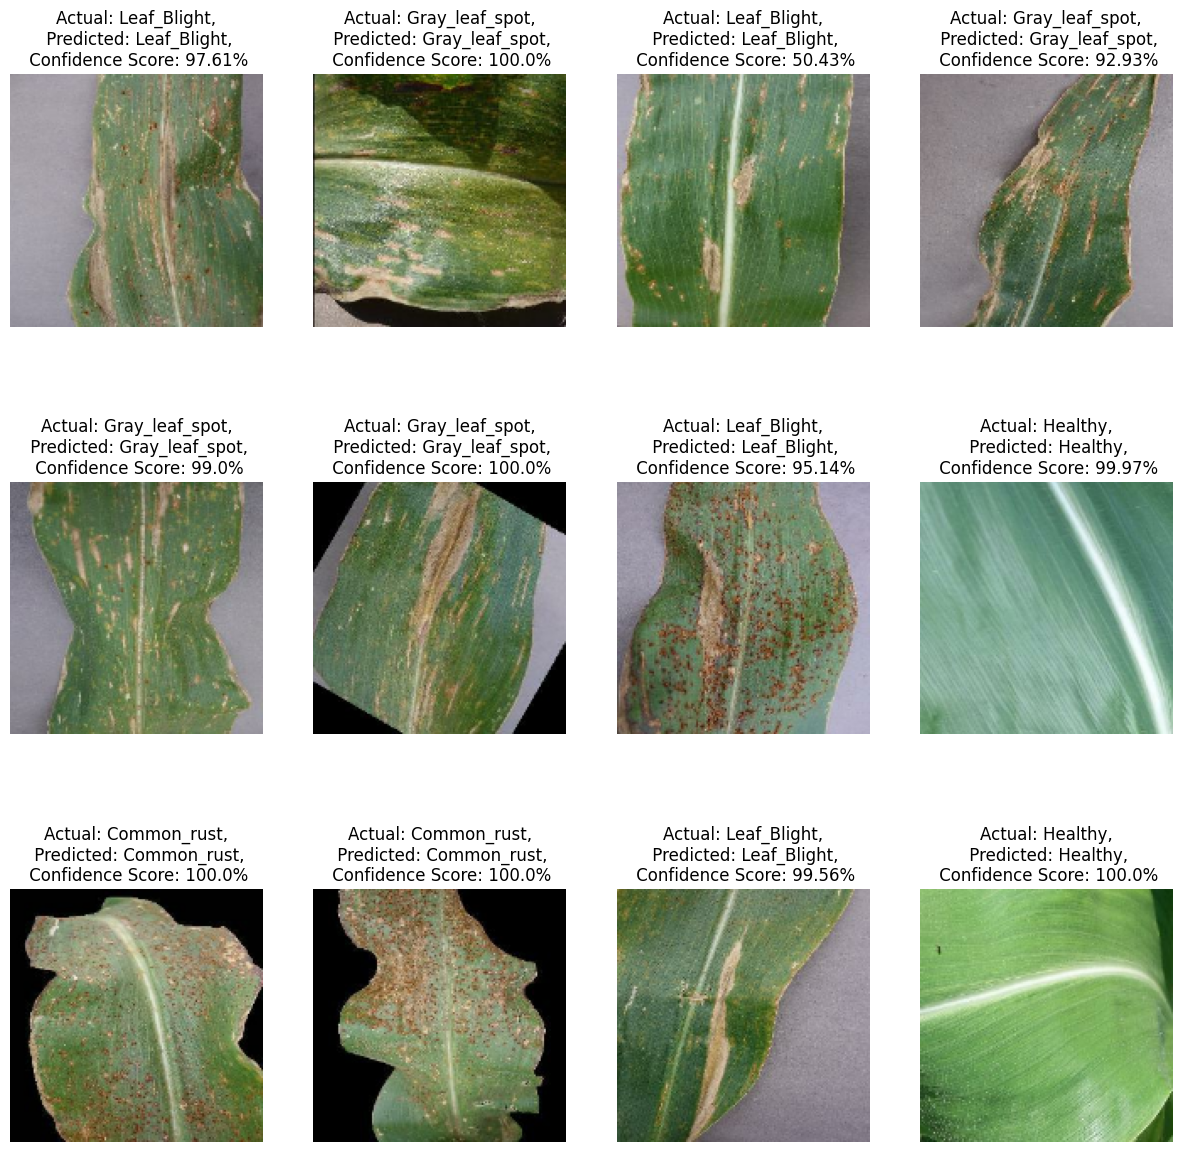

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence Score: {confidence}%")
        plt.axis("off")

In [ ]:
model.save_weights("model_corn_cnn_new.h5")